In [51]:
#Load necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
#Establish the necessary variables for our program
#Define the minimum passing score for the exam as 40.


passmark = 40

In [53]:
print(passmark)

40


In [54]:
#Retrieve information from the CSV file.
df = pd.read_csv("Downloads/StudentsPerformance.csv") 

In [55]:
#Examine the structure of the data.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
#Size of data frame
print(df.shape)

(1000, 8)


In [57]:
#Explore the data's distribution.
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [58]:
#Let us check for any missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

/var/folders/_9/rwvct_lx3fb31mfpfsnvqyf80000gp/T/ipykernel_15733/2025842049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="math score", data = df, palette="bright")


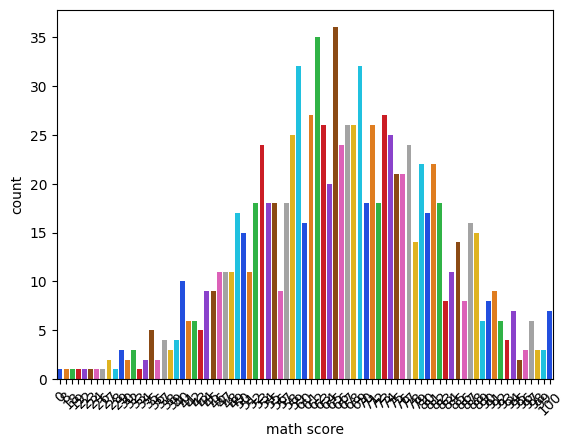

In [59]:
#Analyzing Maths scores
p = sns.countplot(x="math score", data = df, palette="bright")
_ = plt.setp(p.get_xticklabels(), rotation=45) 

In [60]:
#How many students met the minimum score for Math?
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

Math_PassStatus
P    960
F     40
Name: count, dtype: int64

In [61]:
#explore the Reading score
df['Reading_PassStatus']=np.where(df['reading score']>passmark,'P','F')

In [62]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P
4,male,group C,some college,standard,none,76,78,75,P,P


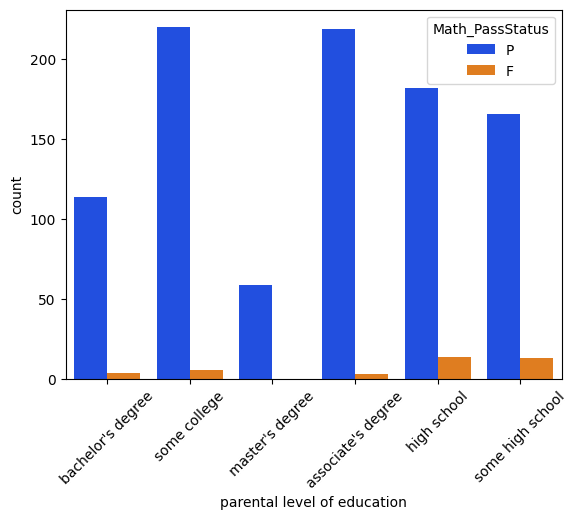

In [63]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=45) 

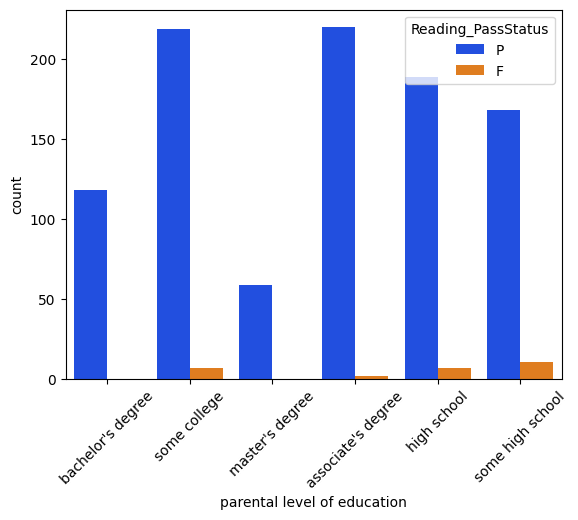

In [64]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=45) 

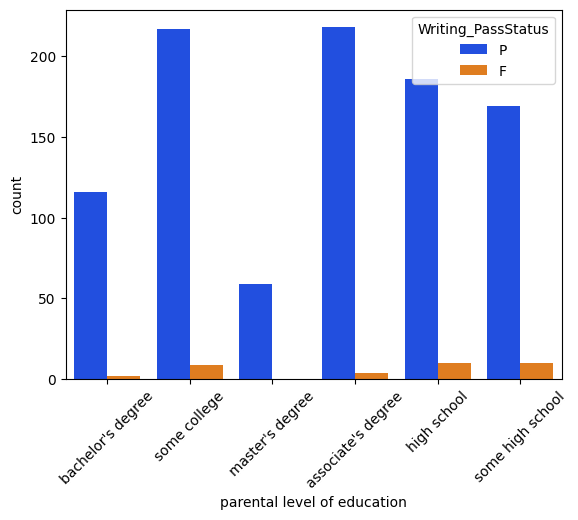

In [65]:
df['Writing_PassStatus']=np.where(df['writing score']>passmark,'P','F')
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=45) 

In [66]:
#Determine the number of students who passed all exams.
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
P    947
F     53
Name: count, dtype: int64

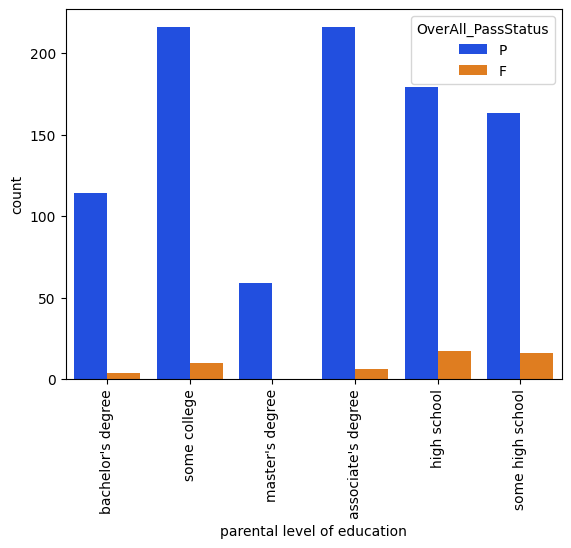

In [67]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [69]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [70]:
female_pass_status_counts = df[df['gender'] == 'female']['OverAll_PassStatus'].value_counts()

In [71]:
print(female_pass_status_counts)

OverAll_PassStatus
P    486
F     32
Name: count, dtype: int64


In [72]:
# Calculate the number of female students who passed overall
female_passed = df[(df['gender'] == 'female') & (df['OverAll_PassStatus'] == 'P')].shape[0]
# Calculate the total number of female students
total_female_students = df[df['gender'] == 'female'].shape[0]
# Calculate the percentage of female students who passed
percentage_female_passed = (female_passed / total_female_students) * 100
# Display the result
print(f"Percentage of female students who passed: {percentage_female_passed:.2f}%")

Percentage of female students who passed: 93.82%


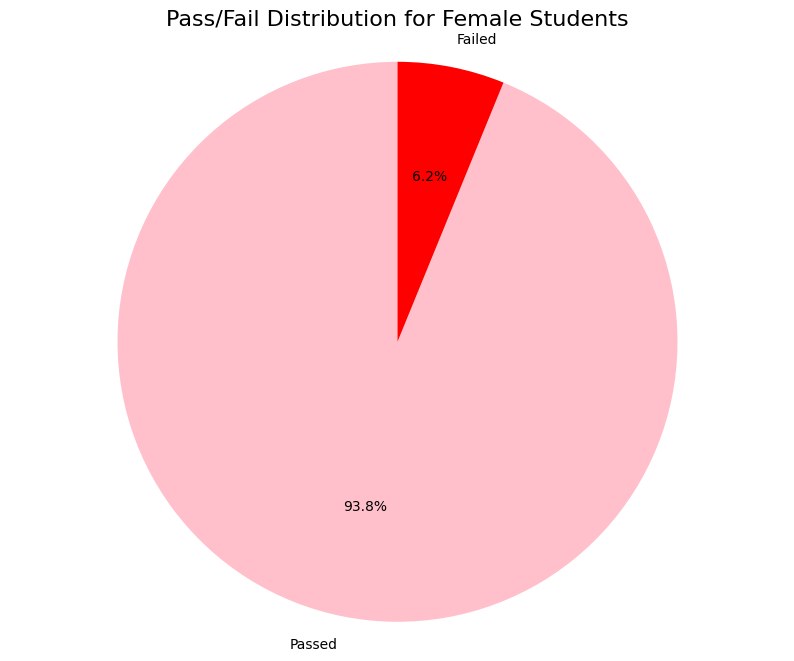

In [73]:
female_passed = df[(df['gender'] == 'female') & (df['OverAll_PassStatus'] == 'P')].shape[0]
female_failed = df[(df['gender'] == 'female') & (df['OverAll_PassStatus'] != 'P')].shape[0]

# Data for the pie chart
sizes = [female_passed, female_failed]
labels = ['Passed', 'Failed']
colors = ['pink', 'red']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Pass/Fail Distribution for Female Students', fontsize=16)

# Display the plot
plt.show()

In [74]:

male_passed = df[(df['gender'] == 'male') & (df['OverAll_PassStatus'] == 'P')].shape[0]


total_male_students = df[df['gender'] == 'male'].shape[0]


percentage_male_passed = (male_passed / total_male_students) * 100

# Display the result
print(f"Percentage of male students who passed: {percentage_male_passed:.3f}%")



Percentage of male students who passed: 95.643%


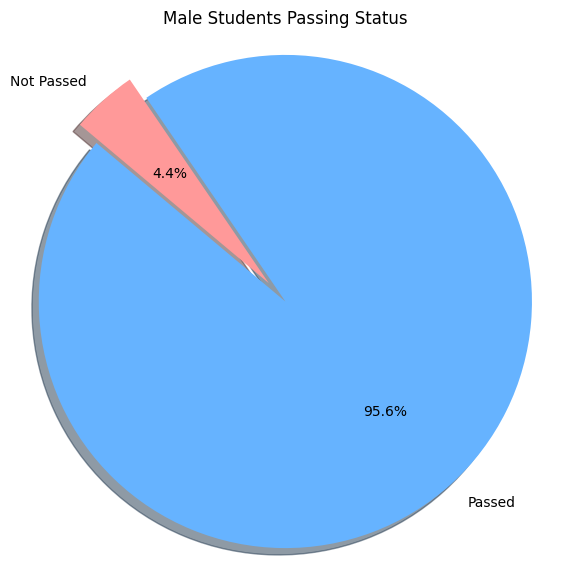

In [75]:
# Calculate the number of male students who did not pass
male_not_passed = total_male_students - male_passed

# Data for the pie chart
labels = ['Passed', 'Not Passed']
sizes = [male_passed, male_not_passed]
colors = ['#66b3ff', '#ff9999']  # Custom colors for the chart

explode = (0.1, 0)  # explode the 'Passed' slice

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Title of the pie chart
plt.title('Male Students Passing Status')

# Display the pie chart
plt.show()

In [76]:
# Male and female students have comparable academic performance
# Checking the role of economic factor in the overall pass percentage
df.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [77]:

standard_passed = df[(df['lunch'] == 'standard') & (df['OverAll_PassStatus'] == 'P')].shape[0]


total_standard_students = df[df['lunch'] == 'standard'].shape[0]


percentage_standard_passed = (standard_passed / total_standard_students) * 100


print(f"Percentage of standard lunch students who passed: {percentage_standard_passed:.3f}%")

Percentage of standard lunch students who passed: 97.984%


In [78]:
low_economic_passed = df[(df['lunch'] == 'free/reduced') & (df['OverAll_PassStatus'] == 'P')].shape[0]


total_low_economic_students = df[df['lunch'] == 'free/reduced'].shape[0]


percentage_low_economic_passed = (low_economic_passed / total_low_economic_students) * 100


print(f"Percentage of low_economic lunch students who passed: {percentage_low_economic_passed:.3f}%")

Percentage of low_economic lunch students who passed: 88.732%


In [79]:
#Economic disparities may influence student achievement, as data shows that students from households with higher incomes, who are more likely to select standard lunches, often demonstrate greater academic success.
# Checking if students of any particular race/ethnicity is outperforming academically
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [80]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [81]:
# Group by race/ethnicity and calculate pass percentage
pass_percentage = df.groupby('race/ethnicity')['OverAll_PassStatus'].apply(lambda x: (x == 'P').mean() * 100).reset_index()
pass_percentage.columns = ['race/ethnicity', 'pass_percentage']

# Sort the results in descending order of pass percentage
pass_percentage = pass_percentage.sort_values('pass_percentage', ascending=False)

# Display the results
print(pass_percentage)

  race/ethnicity  pass_percentage
3        group D        96.183206
4        group E        95.714286
2        group C        94.357367
0        group A        93.258427
1        group B        93.157895


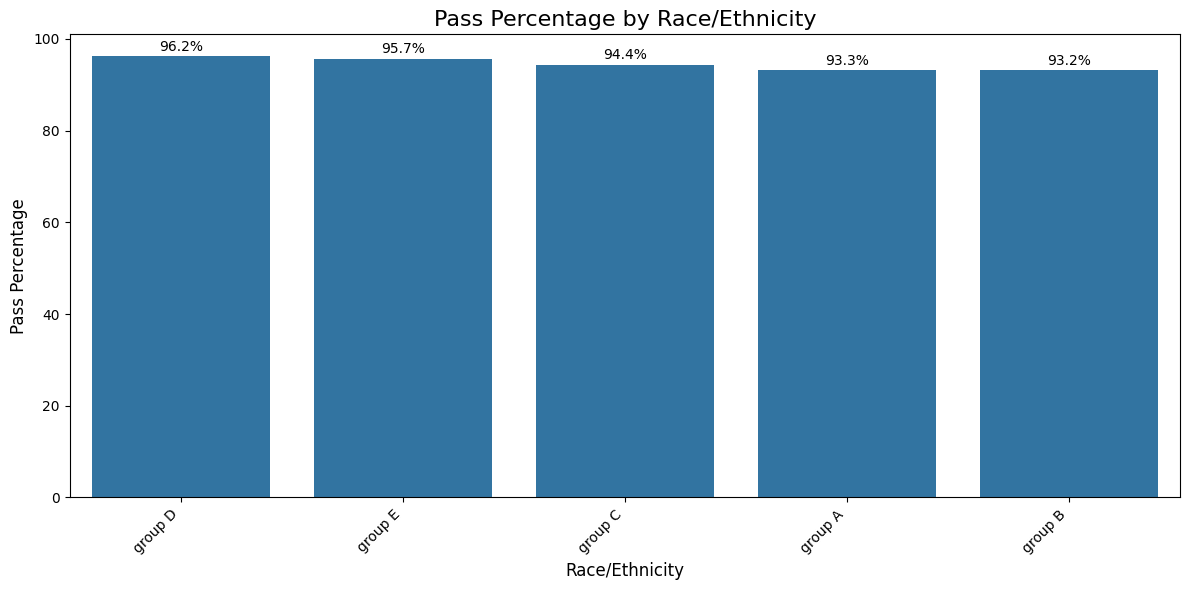

In [82]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='race/ethnicity', y='pass_percentage', data=pass_percentage)

# Customize the plot
plt.title('Pass Percentage by Race/Ethnicity', fontsize=16)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Pass Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add value labels on top of each bar
for i, v in enumerate(pass_percentage['pass_percentage']):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [50]:
# Race/ehnicity has no major influence on the academic performance of students